In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline

# Load the Data

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
cd /content/drive/MyDrive/python_data_analysis/final project

/content/drive/MyDrive/python_data_analysis/final project


In [110]:
filepath = 'data/SeoulBikeData.csv'
df = pd.read_csv(filepath, encoding='ISO-8859-1')

In [111]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [112]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [113]:
df.shape

(8760, 14)

# Clean the Data

## Missing Values

In [114]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We don't have to deal with missing values. But we need to check if each Date is in the dataset 24 times (due to 24 hours), if it is not the case, it implies that there are missing hour for some dates.

In [115]:
unique_values, counts = np.unique(df['Date'], return_counts=True)
for count in counts:
  if count != 24:
    print(False)

## Convert Data

### Date
At this point Date is an object and works more like an Id for each row, (super id combine to Hour) but like Hour, we would like to consider Date information in our features.

So we will create 4 new columns : Day of Week (Monday, Tuesday...), Month and Year wich we be consider in our data for predictions. \\
For each of these new features, we will see later if we keep them or not.

In [116]:
def getDayWeek(date):
  date_object = datetime.strptime(date, "%d/%m/%Y")
  return date_object.strftime("%A")
df['Day of Week'] = df['Date'].apply(getDayWeek)

In [117]:
df['Day of Week'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [118]:
df['Day of Week'] = df['Day of Week'].map({
    'Monday' : 0,
    'Tuesday' : 1,
    'Wednesday' : 2,
    'Thursday' : 3,
    'Friday' : 4,
    'Saturday' : 5,
    'Sunday' : 6
})

First we convert the column Date in datetime :

In [119]:
df['Date'] = pd.to_datetime(df['Date'])

Now, we create the 3 others new rows :

In [120]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

Check when our dataset starts and ends :

In [121]:
df.sort_values(by=['Day', 'Month', 'Year'])
print('Dataset start :')
print(df['Date'].iloc[0])
print('Dataset end :')
print(df['Date'].iloc[df.shape[0]-1])

Dataset start :
2017-01-12 00:00:00
Dataset end :
2018-11-30 00:00:00


So, it means we have more data of 2018, it implies that we can't consider Year like a feature. \\
Just to see the distribution of Year :

<Axes: >

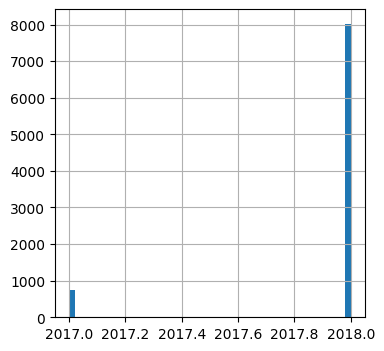

In [122]:
df['Year'].hist(bins=50, figsize=(4,4))

We don't need Date and Year anymore :

In [123]:
df.drop(['Date', 'Year'], axis=1, inplace=True)

### Seasons  
Seasons columns are 4 values :
- Winter
- Spring
- Summer
- Autumn

We will replace themn by 0, 1, 2, 3,

In [124]:
df['Seasons'].unique() #check the uniques values

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [125]:
df['Seasons'] = df['Seasons'].map({'Winter' : 0,
           'Spring' : 1,
           'Summer' : 2,
           'Autumn' : 3})

### Holiday
Same principle for holyday.

In [126]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [127]:
df['Holiday'] = df['Holiday'].map({'No Holiday' : 0,
                                   'Holiday' : 1})

### Functioning Day
Like Seasons same principle.

In [128]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [129]:
df['Functioning Day'] = df['Functioning Day'].map({'Yes' : 1,
                                                   'No' : 0})

Now we check all the type of each column, and we just see the top of the dataframe to have a quick view.

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   int64  
 11  Holiday                    8760 non-null   int64  
 12  Functioning Day            8760 non-null   int64  
 13  Day of Week                8760 non-null   int64

In [131]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day of Week,Day,Month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,4,12,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,4,12,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,4,12,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,4,12,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,4,12,1


# Visualization

## Analysis

### Distribution of each features
Just to see global distribution of each feature

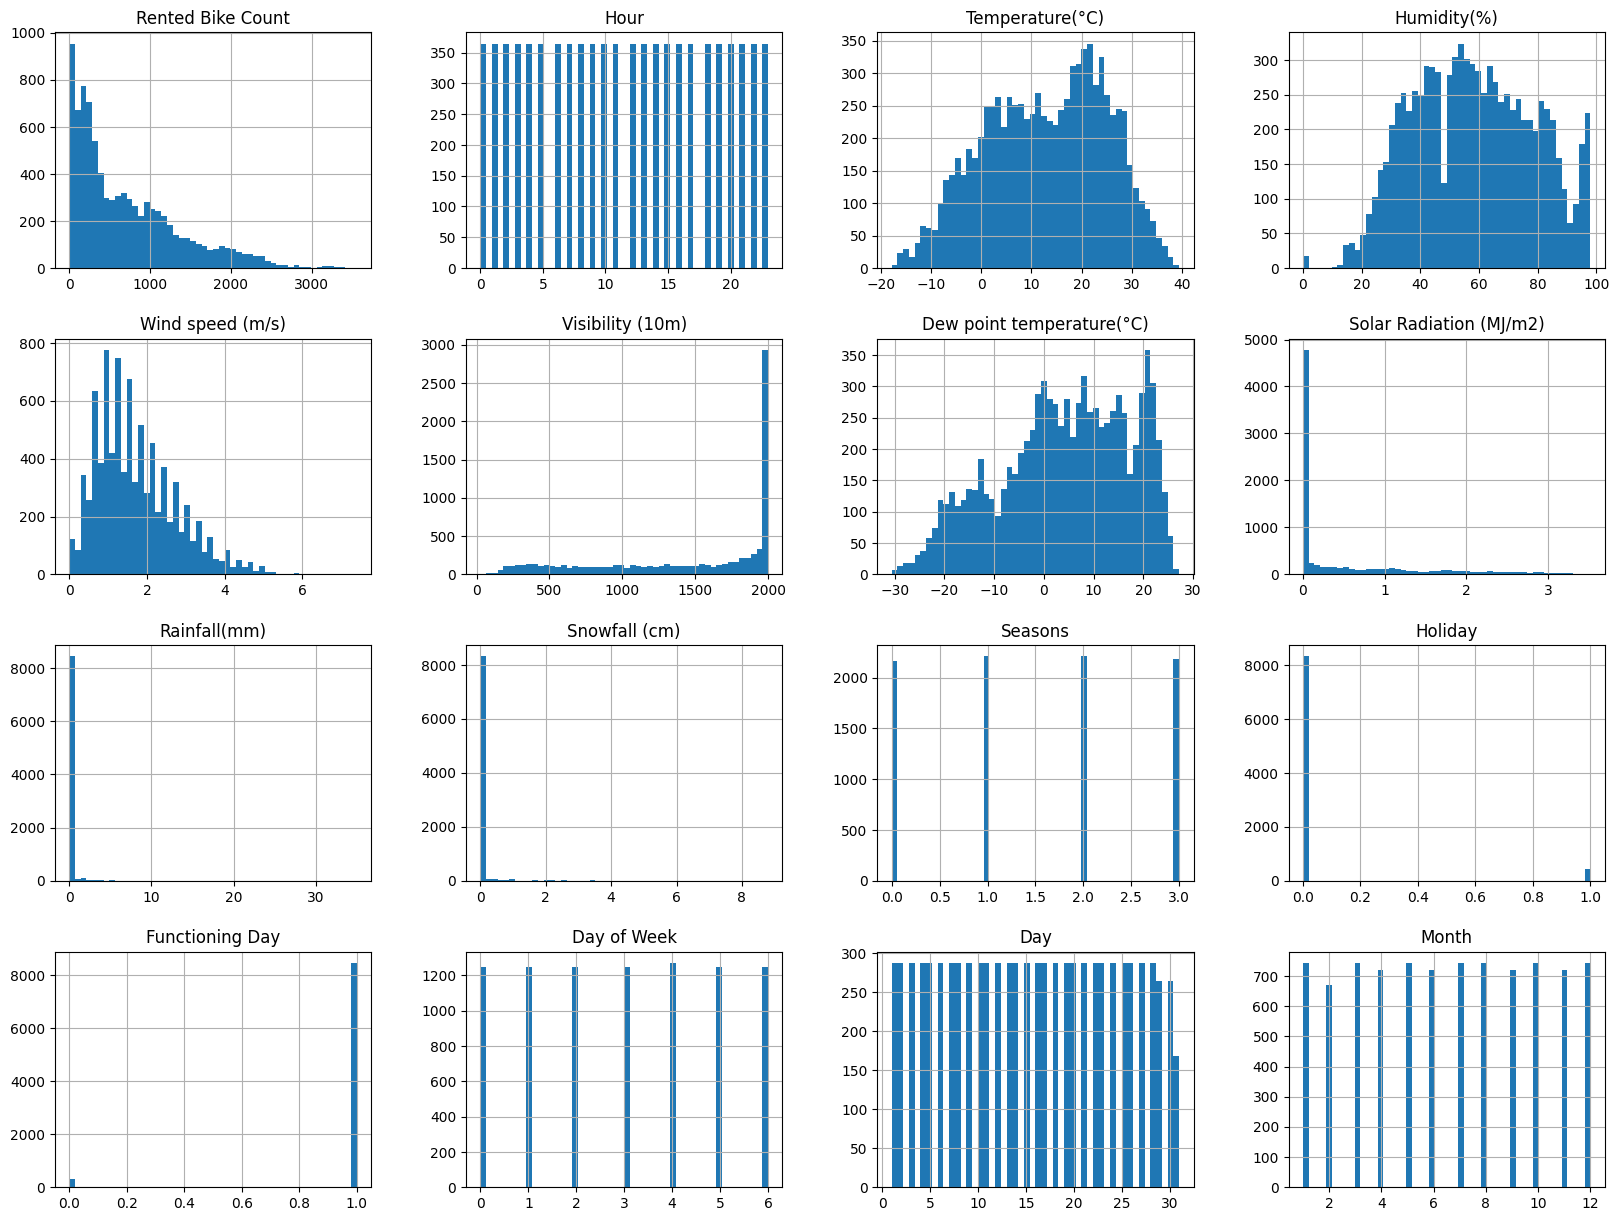

In [132]:
df.hist(bins=50, figsize=(20,15))
plt.show()

- In a quick view, we can see that few continuous features are not well distributed, especially Snowfall, Rainfall, Visibility and Solar Radiation.
- For categorical data, None Functioning Day are under represented.

### Day of Week, and Hour

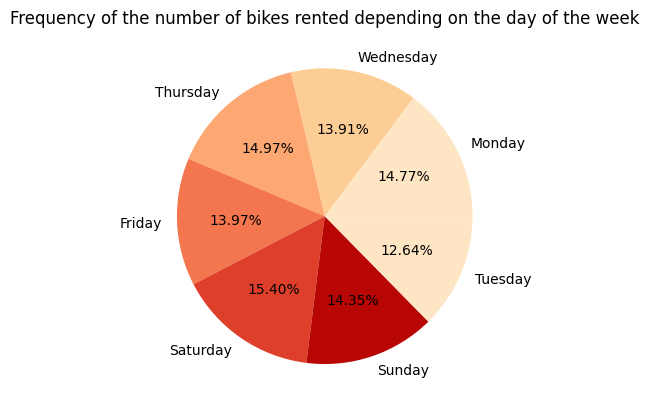

In [133]:
total = df['Rented Bike Count'].sum()
day_of_week = sorted(list(df['Day of Week'].unique()))
labels = ['Monday', 'Wednesday','Thursday','Friday','Saturday','Sunday', 'Tuesday']
freq = [np.where(df['Day of Week'] == day, df['Rented Bike Count'], 0).sum()/total for day in day_of_week]
colors = sns.color_palette('OrRd')
plt.pie(freq, labels = labels, colors = colors, autopct='%.2f%%')
plt.title("Frequency of the number of bikes rented depending on the day of the week")
plt.show()

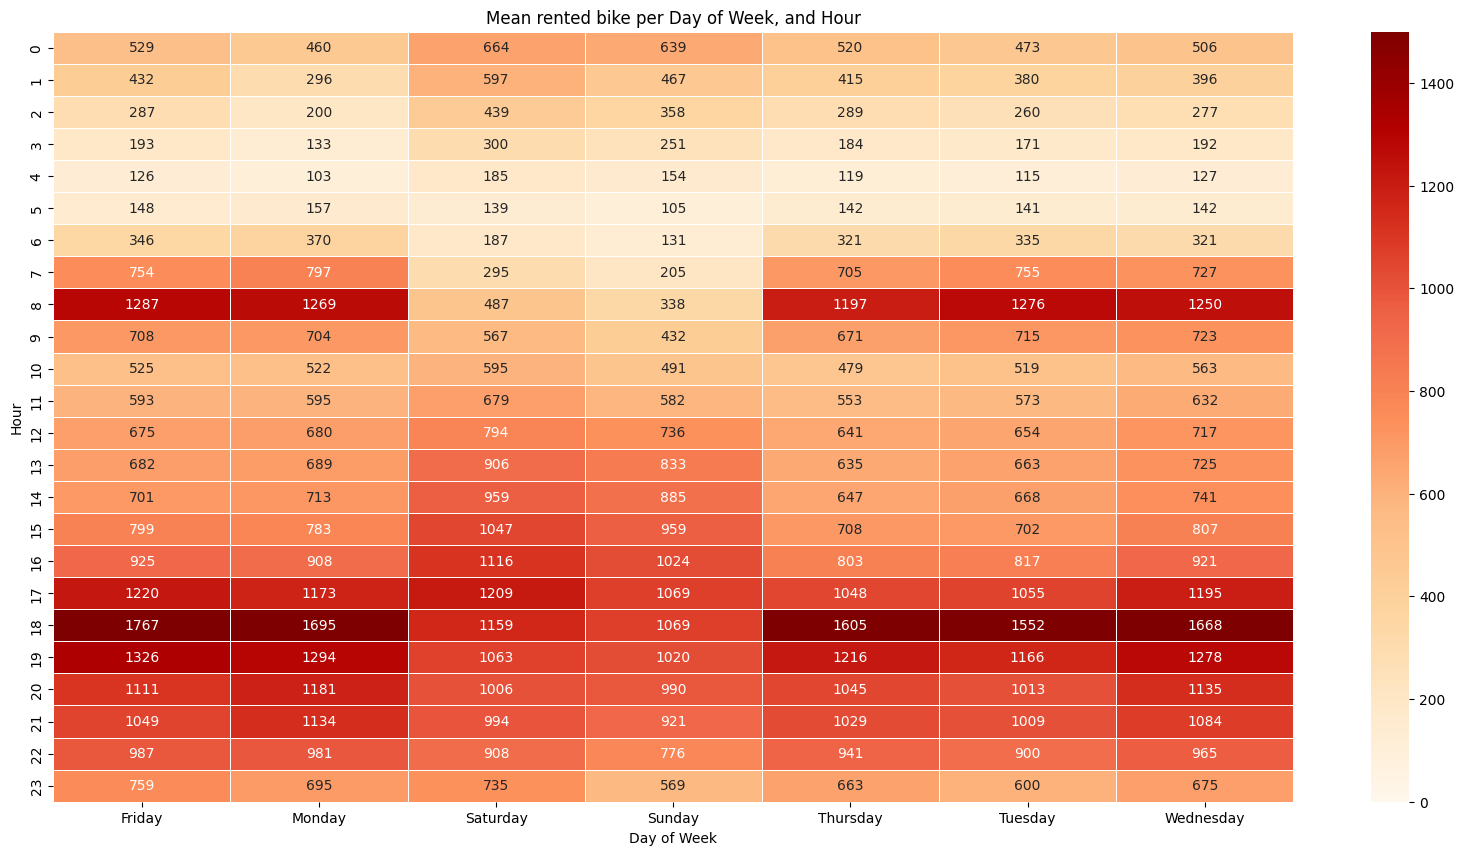

In [134]:
grouped_df = df.groupby(by=['Hour', 'Day of Week'])['Rented Bike Count'].mean().reset_index()
grouped_df['Day of Week'] = grouped_df['Day of Week'].map({
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 :'Sunday'
})
plt.figure(figsize=(20, 10))
data = grouped_df.pivot(index="Hour", columns="Day of Week", values="Rented Bike Count")
colormap = sns.color_palette("OrRd", 1000)
sns.heatmap(data, annot=True, cmap=colormap, linewidths=.5, fmt=".0f", vmin=0, vmax=1500)
plt.title("Mean rented bike per Day of Week, and Hour")
plt.show()

- We can see that, for each day, at 18 hour, there are a lot of rented bike. It can be explain by the fact that people go back to work or go out during the weekend .
- At 8 hour, a lot of bikes are rented, except for the weekend. It can be explain by the fact that people go to work at this hour.

Fives moment with best mean of number of rented bike :

In [135]:
grouped_df.sort_values(by='Rented Bike Count', ascending=False).head(5)

,Hour,Day of Week,Rented Bike Count
130,18,Friday,1767.452830
126,18,Monday,1695.000000
128,18,Wednesday,1668.096154
129,18,Thursday,1604.980769
127,18,Tuesday,1552.346154


Again it highligths that 18 hour is a good hour. \\
Fives moment with bad mean of number of rented bike :

In [136]:
grouped_df.sort_values(by='Rented Bike Count').head(5)

,Hour,Day of Week,Rented Bike Count
28,4,Monday,103.153846
41,5,Sunday,104.807692
29,4,Tuesday,115.096154
31,4,Thursday,118.942308
32,4,Friday,125.509434


We can notice that at early hours people don't really rent bikes, but it is logical.

## Categorical Data

In [137]:
categorical_data = []
for col in df.columns:
  if len(df[col].unique()) <= 31:
    categorical_data.append(col)
categorical_data

['Hour',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Day of Week',
 'Day',
 'Month']

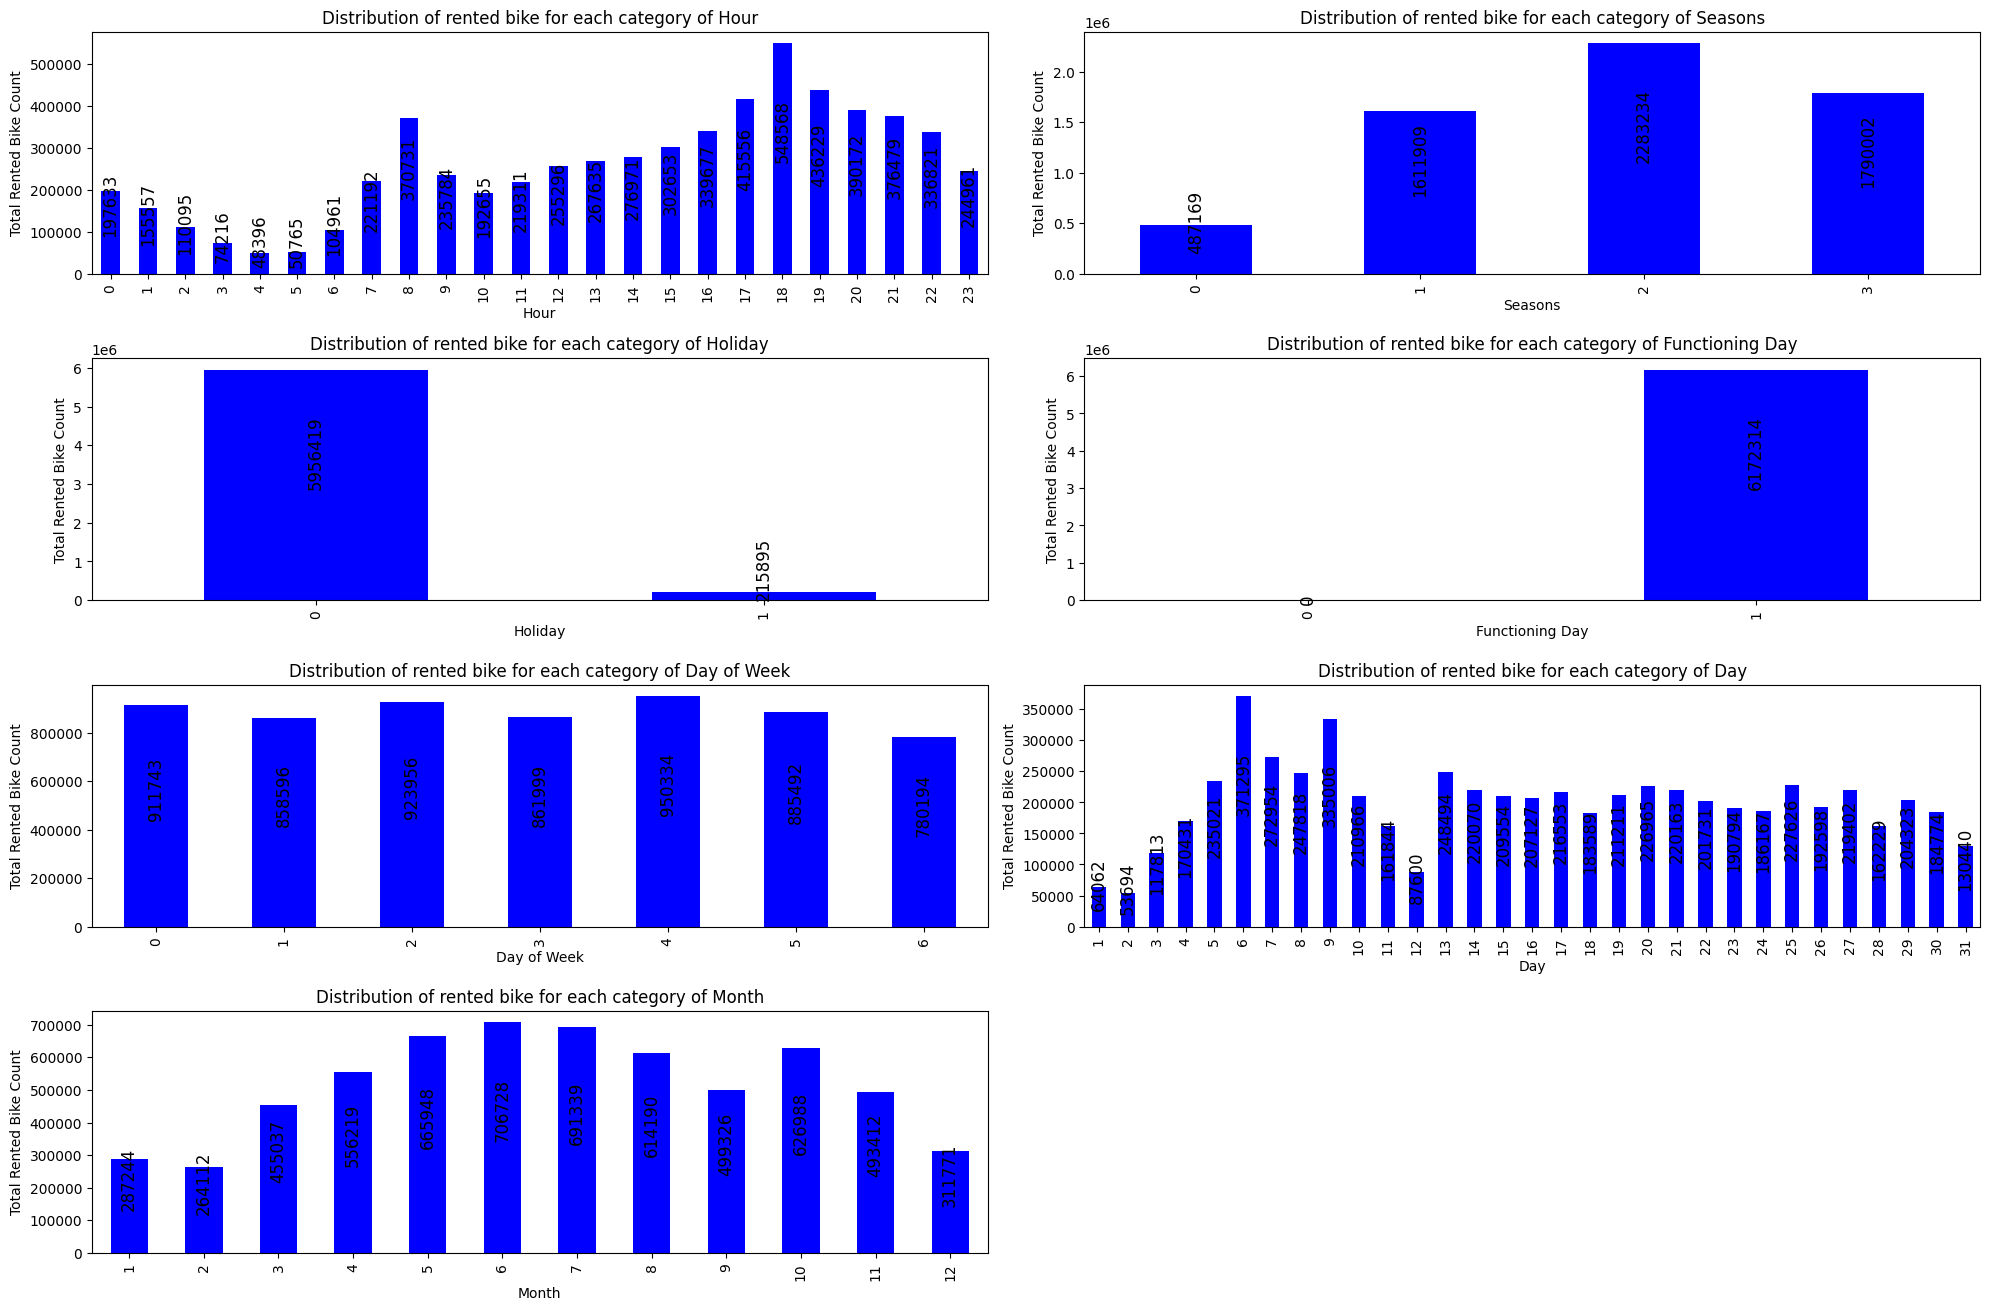

In [138]:
fig = plt.figure(figsize = (20,16))
for i, col in enumerate(categorical_data) :
  plt.subplot(5, 2,i+1)
  df.groupby(col)['Rented Bike Count'].sum().plot(kind='bar',color="blue")
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count')
  plt.tight_layout()
  #show total rented bike for each hist
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()/2),ha='center',size= 12, rotation=90)
  plt.title('Distribution of rented bike for each category of ' + col)

We can see that feature 'Functioning Day' will not be useful because there are 0 counted rented bike when it is not a functioning day.  \\
So, we don't need Functioning Day column, so :
- First, we drop all rows where the day is not a functioning Day
- After, we drop all the column

In [139]:
df = df[df['Functioning Day'] != 0]

In [140]:
df.drop('Functioning Day', axis=1,inplace=True)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day of Week,Day,Month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,4,12,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,4,12,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,4,12,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,4,12,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,4,12,1


## Correlation

<Axes: >

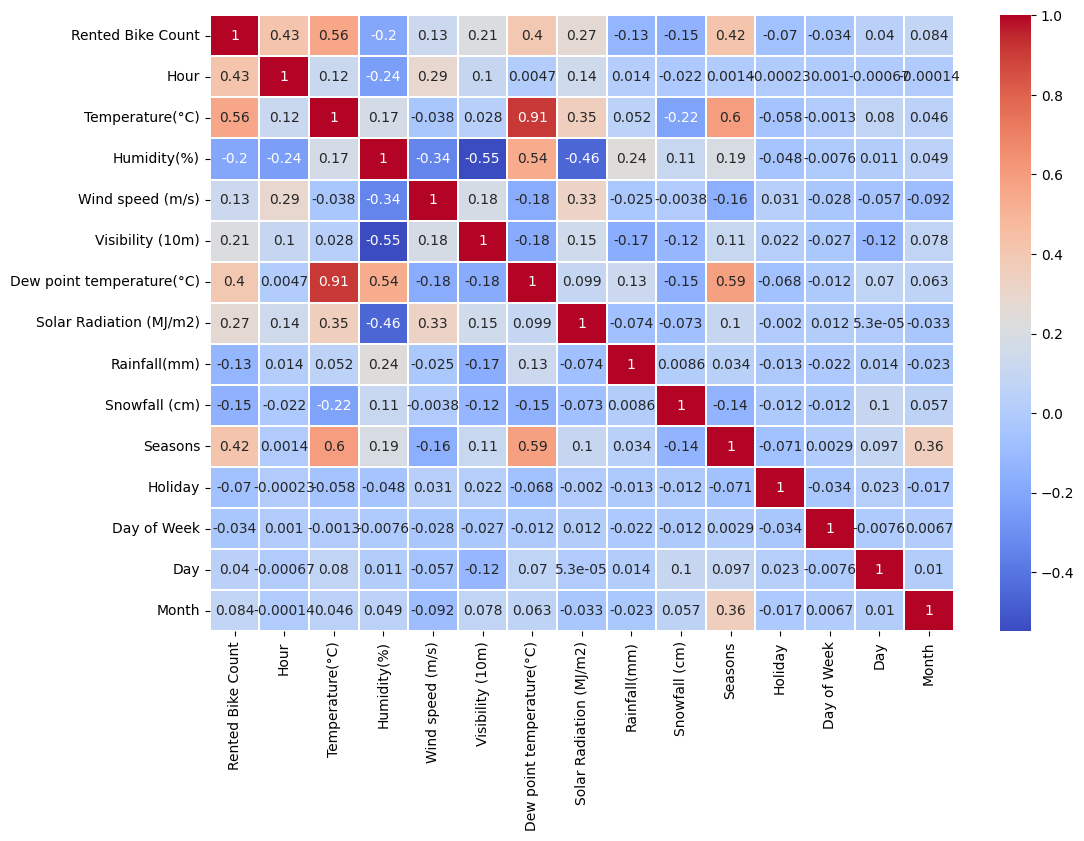

In [141]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [142]:
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.425256
Temperature(°C)              0.562740
Humidity(%)                 -0.201973
Wind speed (m/s)             0.125022
Visibility (10m)             0.212323
Dew point temperature(°C)    0.400263
Solar Radiation (MJ/m2)      0.273862
Rainfall(mm)                -0.128626
Snowfall (cm)               -0.151611
Seasons                      0.419575
Holiday                     -0.070070
Day of Week                 -0.034272
Day                          0.040039
Month                        0.084027
Name: Rented Bike Count, dtype: float64

We need to drop 'Dew point temperature(°C)' because :
- it is to much correlate with 'Temperature(°C)'
- but 'Temperature(°C)' has a better correlation with 'Rented Bike Count'

In [143]:
df.drop('Dew point temperature(°C)', axis=1, inplace=True)

# Normalization

## Visualization of continuous values

In [144]:
continuous_data = []
for col in df.columns:
  if len(df[col].unique()) > 31:
    continuous_data.append(col)
continuous_data

['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

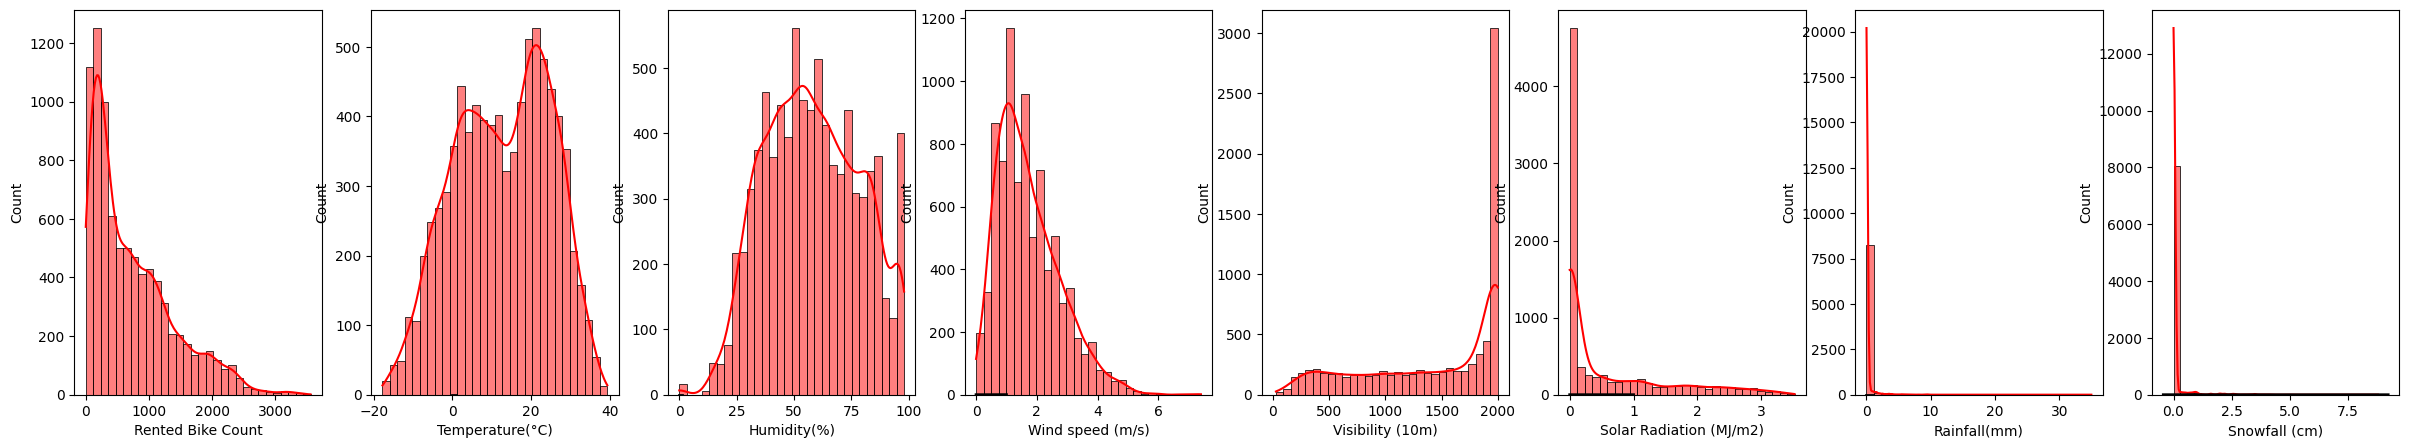

In [145]:
from scipy.stats import norm
fig, axes = plt.subplots(1, len(continuous_data), figsize=(30, 5))
for i, col in enumerate(continuous_data):
  #plot_normal_distribution(col)
  data = df[col]
  # Plot the histogram with KDE
  sns.histplot(data, kde=True,ax=axes[i], color='red', bins=30)

  # Overlay the normal distribution
  mu, std = np.mean(data), np.std(data)
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)
  axes[i].plot(x, p, 'k', linewidth=2)

plt.show()

- 'Rented Bike Count' is not normally distributed.
- 'Wind speed (m/s)' is not normally distributed.



- 'Temperature(°C)' doesn't need transformation.
- 'Humidity(%)' doesn't need transformation.


- We can't apply normalization at 'Visibility (10m)', 'Solar Radiation (Mj/m2)', 'Rainfall(mm)' and 'Snowfall (cm)'.

## Apply Normalization

We will create a new dataset where we will use normalization :

In [146]:
df_norm = df.copy()

Create a function which plots different transformation methods to apply normalization on a column of df :

In [147]:
def plot_normalize_method(col):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    data = df[col]
    # Original data
    sns.histplot(data, ax=axes[0], color='blue').set_title('Normal Data')
    # Log-transformed data
    sns.histplot(np.log1p(data + 0.0000001), ax=axes[1], color='red').set_title("log1p")
    # Square root-transformed data
    sns.histplot(np.sqrt(data), ax=axes[2], color='green').set_title("Square root")
    # Cube root-transformed data
    sns.histplot(np.cbrt(data * 2), ax=axes[3], color='purple').set_title("Cube root")
    plt.show()

#### Rented Bike Count

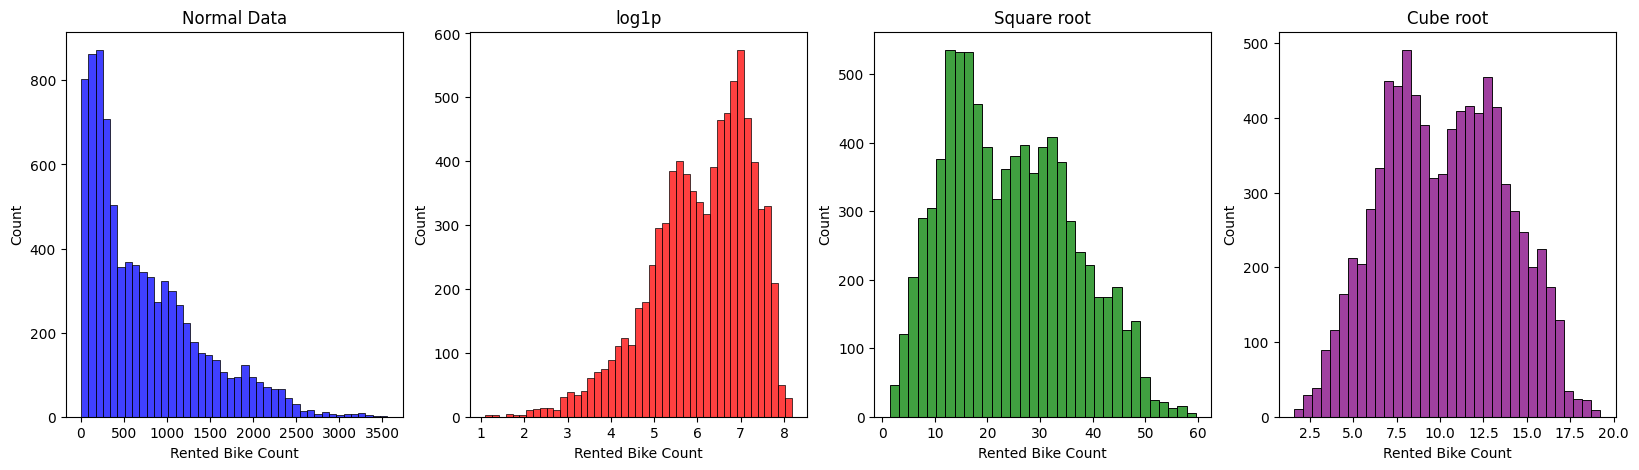

In [148]:
plot_normalize_method('Rented Bike Count')

In [149]:
#apply square root
df_norm['Rented Bike Count'] = np.sqrt(df_norm['Rented Bike Count'])

For 'Rented Bike Count', square root method looks to be a good method to apply normalization.

#### Wind speed (m/s)

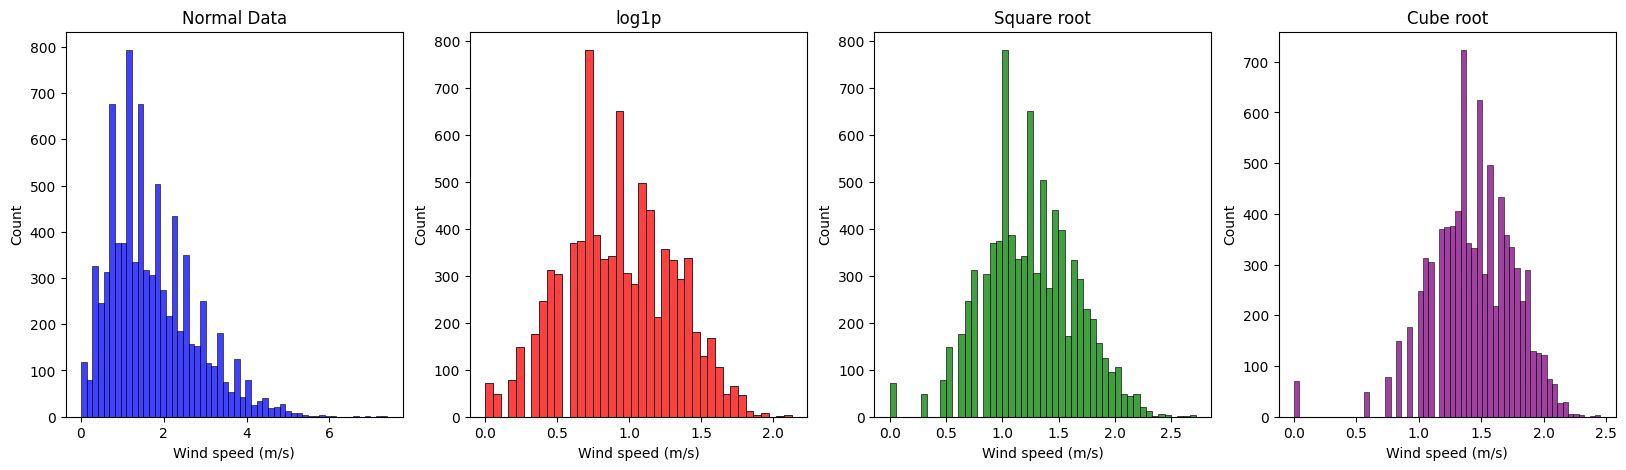

In [150]:
plot_normalize_method('Wind speed (m/s)')

Same, square root looks to be a good choice.

In [151]:
#apply square root
df_norm['Wind speed (m/s)'] = np.sqrt(df_norm['Wind speed (m/s)'])

# Regression Model

In [152]:
df_norm.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day of Week,Day,Month
0,15.937377,0,-5.2,37,1.483240,2000,0.0,0.0,0.0,0,0,4,12,1
1,14.282857,1,-5.5,38,0.894427,2000,0.0,0.0,0.0,0,0,4,12,1
2,13.152946,2,-6.0,39,1.000000,2000,0.0,0.0,0.0,0,0,4,12,1
3,10.344080,3,-6.2,40,0.948683,2000,0.0,0.0,0.0,0,0,4,12,1
4,8.831761,4,-6.0,36,1.516575,2000,0.0,0.0,0.0,0,0,4,12,1


In [153]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import clear_output
from IPython.display import display, HTML
import math

In [154]:
def model_eval(dataset, model, test_size):
  #custom split data with dataset and test_size
  X = dataset.drop('Rented Bike Count', axis=1)
  y = dataset['Rented Bike Count']
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size,  random_state=42)
  #fit data
  model.fit(x_train, y_train)
  #predict
  y_pred = model.predict(x_test)
  #get score information
  info = []
  info.append(mean_absolute_error(y_test**2, y_pred**2))
  info.append(math.sqrt(mean_squared_error(y_test**2,y_pred**2)))
  info.append(r2_score(y_test**2, y_pred**2))

  return y_pred, y_test, info

In [155]:
def compare_model(df, models, test_sizes):
    # name of each models
    models_array = []
    test_sizes_array = []
    # save mean absolute error
    maes = []
    # save rmse
    rmses = []
    # save r2 score
    r2_scores = []
    # total of training we will compute
    total_iter = len(models) * len(test_sizes)
    i = 0
    for model in models:
      for test_size in test_sizes:
        try:
          #display where we are on the run
          display(HTML(f'<h2>Current Iteration: {i + 1}/{total_iter}</h2>'))
          _, _, info = model_eval(df,model,test_size)
          test_sizes_array.append(test_size)
          models_array.append(str(model).split('(')[0])
          maes.append(info[0])
          rmses.append(info[1])
          r2_scores.append(info[2])

          # clear print output
          clear_output(wait=True)

        except Exception as e:
          e
        i +=1

    # save all in a dataframe
    return pd.DataFrame({
        'model' : models_array,
        'test_size' : test_sizes_array,
        'mae' : maes,
        'rmse' : rmses,
        'r2_score' : r2_scores})

In [156]:
!pip install catboost

In [157]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
# Create instances of regression models
xgboost_regressor = XGBRegressor()
lgbm_regressor = LGBMRegressor(num_leaves=41, n_estimators=200,random_state=42 )
catboost_regressor = CatBoostRegressor()
extra_trees_regressor = ExtraTreesRegressor(random_state=42)
# Create an array of regression models
models = [
    xgboost_regressor, catboost_regressor, lgbm_regressor,extra_trees_regressor
]

In [158]:
test_sizes = [0.1, 0.2]

In [159]:
df_compare = compare_model(df_norm, models, test_sizes)

In [160]:
sorted_df = df_compare.sort_values(by=['mae', 'rmse'])
sorted_df.head(30)

,model,test_size,mae,rmse,r2_score
4,LGBMRegressor,0.1,73.577601,138.594365,0.950587
2,<catboost.core.CatBoostRegressor object at 0x7...,0.1,78.757111,140.344302,0.949331
5,LGBMRegressor,0.2,78.910198,156.441546,0.937660
0,XGBRegressor,0.1,79.983131,142.544546,0.947730
3,<catboost.core.CatBoostRegressor object at 0x7...,0.2,80.486470,153.559410,0.939936
6,ExtraTreesRegressor,0.1,84.744131,150.282554,0.941901
1,XGBRegressor,0.2,85.582414,159.309880,0.935353
7,ExtraTreesRegressor,0.2,88.274669,166.640082,0.929267


## See Results

In [161]:
y_pred, y_test,  info = model_eval(df_norm, LGBMRegressor(num_leaves=41, n_estimators=200,random_state=42) , 0.1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 7618, number of used features: 13
[LightGBM] [Info] Start training from score 24.260267


In [162]:
mae = mean_absolute_error(y_test**2, y_pred**2)
rmse = math.sqrt(mean_squared_error(y_test**2,y_pred**2))
r2 = r2_score(y_test**2, y_pred**2)
print('mae : ', mae)
print('rmse : ', rmse)
print('r2 : ', r2)

mae :  73.57760135866488
rmse :  138.59436480748553
r2 :  0.9505870021143538


In [163]:
true = y_test**2
predict = y_pred**2
errors = abs(true-predict)
df_result = pd.DataFrame({
    'true' : true,
    'predict' : predict,
    'error' : errors
})
display(df_result)

,true,predict,error
5993,1232.0,1214.610556,17.389444
5340,964.0,950.252854,13.747146
5951,942.0,961.060009,19.060009
879,373.0,348.473208,24.526792
6909,1259.0,1814.602464,555.602464
...,...,...,...
6438,243.0,236.033057,6.966943
1263,63.0,256.534483,193.534483
2215,159.0,207.355944,48.355944
538,235.0,238.086986,3.086986


## Analysis of Results

In [164]:
df_result.describe()

,true,predict,error
count,847.000000,847.000000,847.000000
mean,720.795750,716.633559,73.577601
std,623.851889,600.910849,117.520383
min,4.000000,7.108317,0.004763
25%,212.000000,230.922985,15.025617
50%,542.000000,544.189697,37.451444
75%,1072.000000,1058.772563,89.306223
max,3123.000000,2865.720798,1771.859335


In [165]:
def plot_error(y_test, y_pred):
  residuals = y_test - y_pred
  # Plotting the Residuals
  plt.scatter(y_test, residuals, color='blue')
  plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
  plt.title('Residual Plot')
  plt.xlabel('Actual Values')
  plt.ylabel('Residuals')
  plt.show()

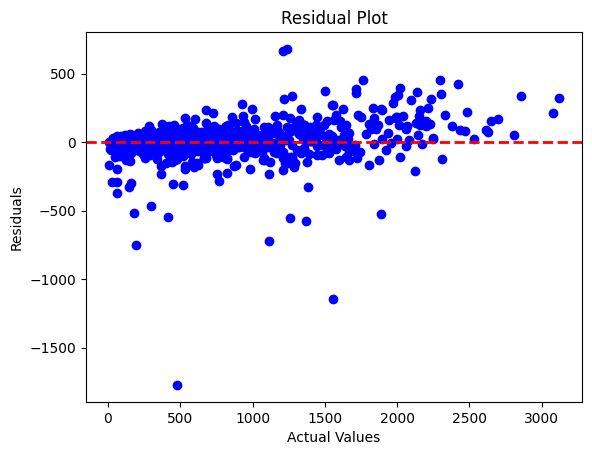

In [166]:
plot_error(true, predict)

In [ ]:
def predict_true(y_test, y_pred):
  plt.scatter(y_test, y_predict, color='blue')
  plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
  plt.title('Predicted vs. Actual Values')
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.show()

In majority, errors are close to the line. But we have errors really bigger than sample errors.

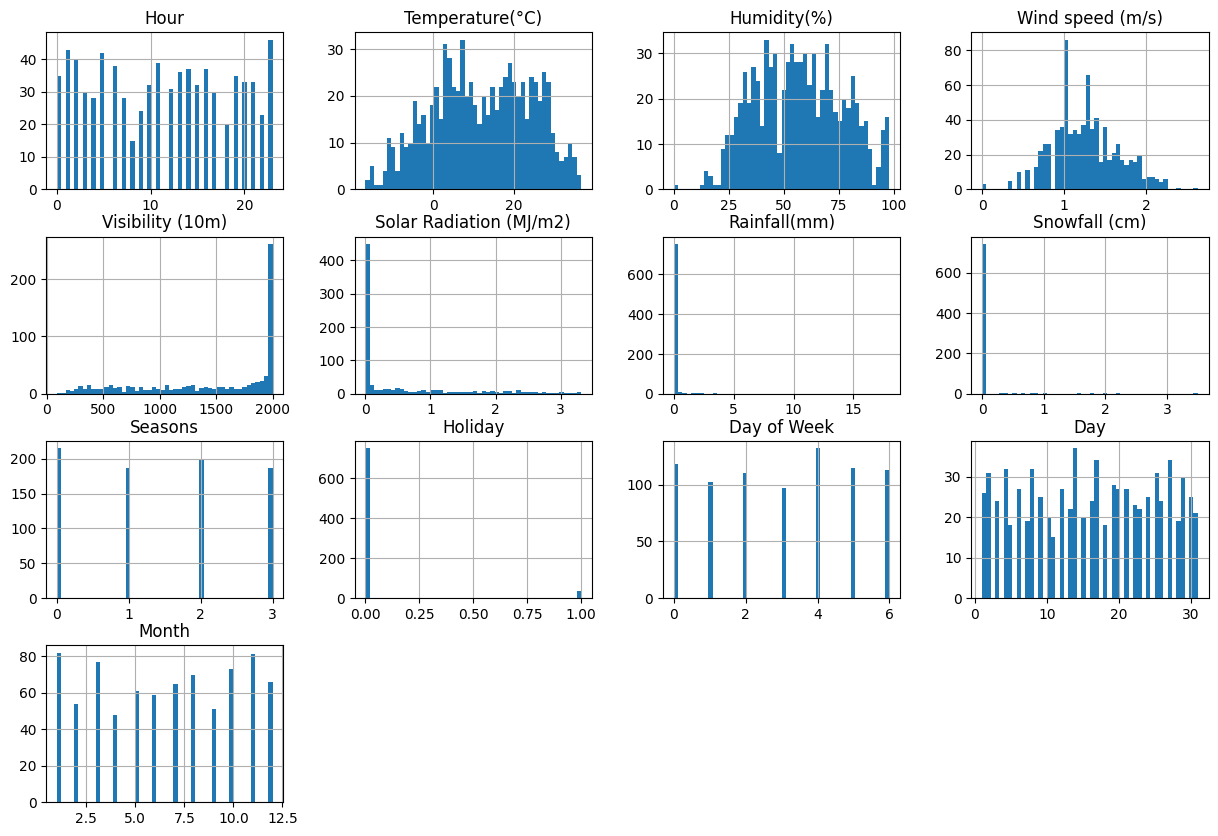

In [167]:
x_test.loc[df_result.loc[df_result['error'] <= 200 , 'true'].index].hist(bins=50, figsize=(15, 10))
plt.show()

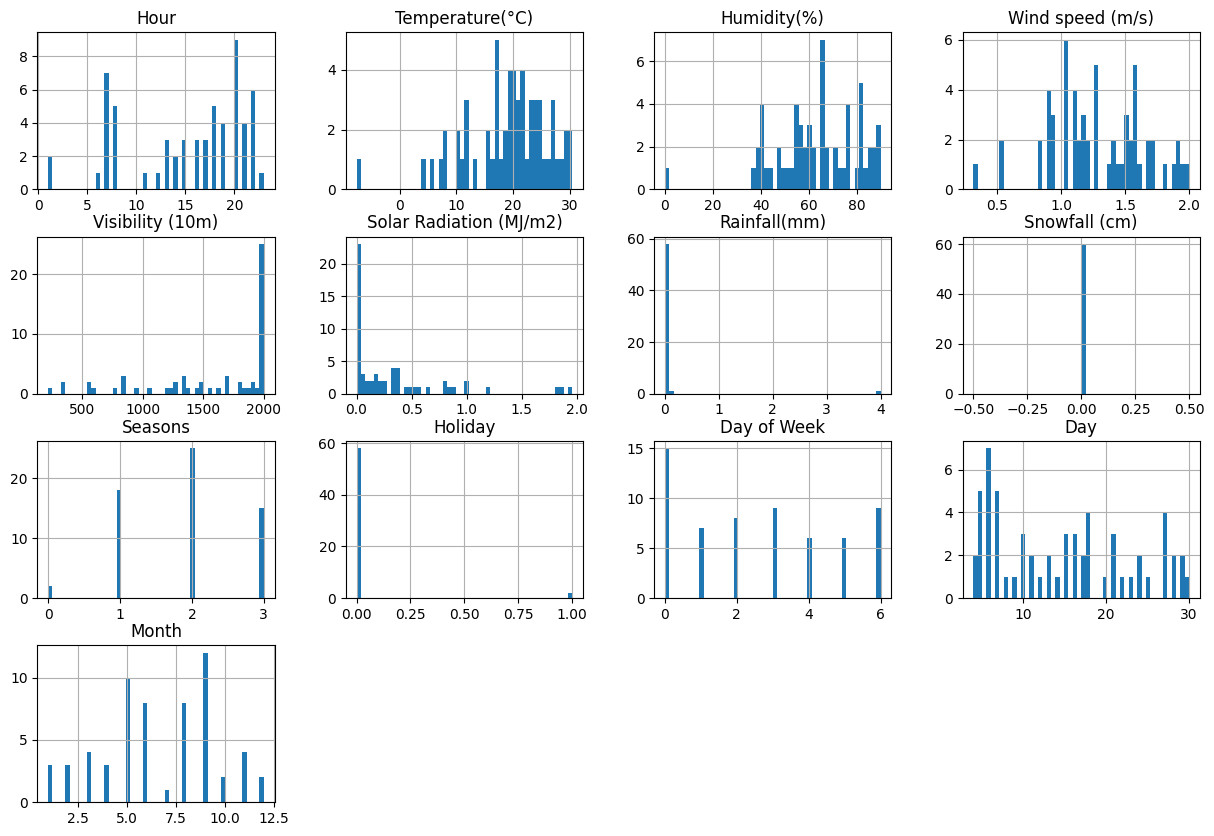

In [168]:
x_test.loc[df_result.loc[df_result['error'] > 200 , 'true'].index].hist(bins=50, figsize=(15, 10))
plt.show()

# LGBMRegressor

In [169]:
import time

## Hyperparameter Tuning

### Find best n_estimators parameter

- This parameter defines the number of trees (or base learners) to be built in the ensemble.
- In Gradient Boosting algorithms, such as LightGBM, trees are built sequentially. Each tree corrects the errors made by the previous ones. The final prediction is the sum of the predictions from all trees. Increasing n_estimators in gradient boosting typically improves the model's performance, but it may also increase the risk of overfitting. \\
So more we increase it, more our model is efficient. Perhaps, it will also increase time complexity.
- So, in this part, we will try to chose a good n_estimators between 200 and 6000 based on when the mae, rmse and r2 score don't change a lot when we increase it.

In [170]:
mae = []
rmse = []
r2 = []
times = []
n_estimators = np.arange(200, 6000, 200)
total_iter = len(n_estimators)
i = 0
for n_estim in n_estimators:
  start_time = time.time()
  display(HTML(f'<h2>Current Iteration: {i + 1}/{total_iter}</h2>'))
  _, _, info = model_eval(df_norm,LGBMRegressor(n_estimators=n_estim) , 0.1)
  end_time = time.time()
  mae.append(info[0])
  rmse.append(info[1])
  r2.append(info[2])
  times.append(end_time - start_time)
  clear_output(wait=True)
  i+=1

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 7618, number of used features: 13
[LightGBM] [Info] Start training from score 24.260267


In [171]:
def getConvPoint(X, Y, eps):
  for i in range(len(X)-1):
    if abs(Y[i+1] - Y[i]) <= eps:
      return X[i], Y[i]
  return None

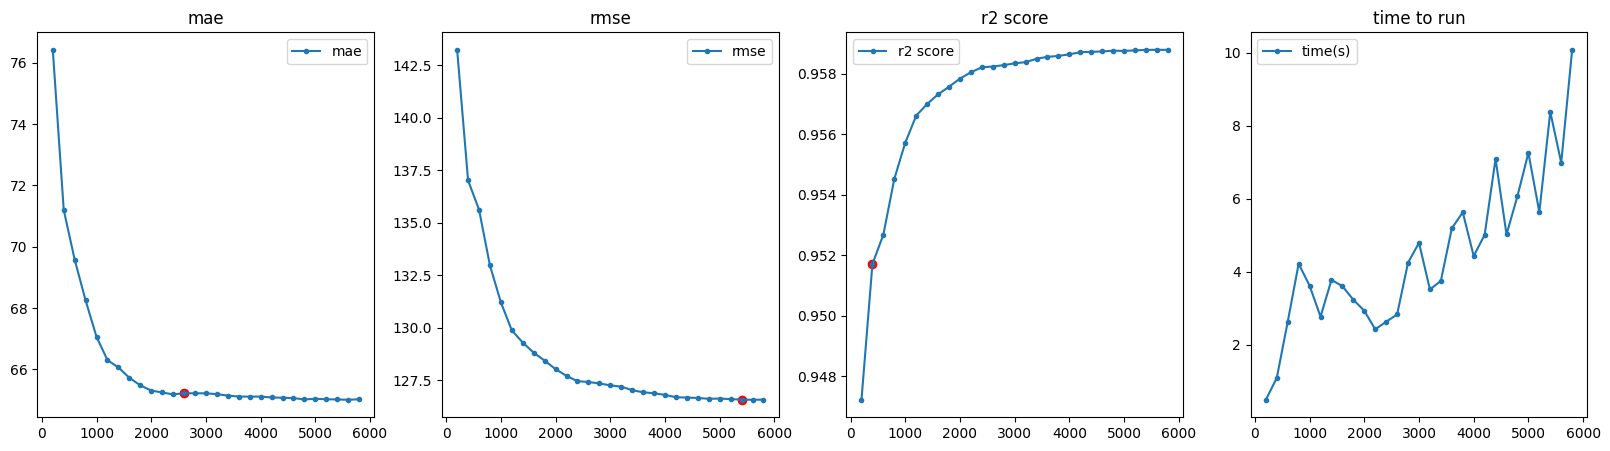

In [172]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].plot(n_estimators, mae, label='mae', marker='.', linestyle='-')
conv_point_mae = getConvPoint(n_estimators, mae, 0.01)
if conv_point_mae:
  axes[0].scatter(conv_point_mae[0],conv_point_mae[1], color='red')
axes[0].set_title('mae')

axes[1].plot(n_estimators, rmse, label='rmse', marker='.', linestyle='-')
conv_point_rmse = getConvPoint(n_estimators, rmse, 0.01)
if conv_point_rmse:
  axes[1].scatter(conv_point_rmse[0],conv_point_rmse[1], color='red')
axes[1].set_title('rmse')

axes[2].plot(n_estimators, r2, label='r2 score', marker='.', linestyle='-')
conv_point_r2 = getConvPoint(n_estimators, r2, 0.001)
if conv_point_r2:
  axes[2].scatter(conv_point_r2[0],conv_point_r2[1], color='red')
axes[2].set_title('r2 score')

axes[3].plot(n_estimators, times, label='time(s)', marker='.', linestyle='-')
axes[3].set_title('time to run')

for ax in axes:
    ax.legend()
plt.show()

So we can use n_estimators = 3000, it looks to be a good choice.

In [173]:
best_n_estimators = 3000

### GridSearch

In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [175]:
#disable warnings
import warnings

We will use RMSE score to choose best parameters with grid search.

In [176]:
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

Implement our model with datasets, create a parameter dictionary :

In [177]:
#disable warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

X = df_norm.drop('Rented Bike Count', axis=1)
y = df_norm['Rented Bike Count']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1,  random_state=42)

parameters = {'learning_rate': [0.01, 0.1, 0.2],
              'n_estimators': [best_n_estimators],
              'max_depth': [12, 15, 16],
              'subsample': [0.6, 0.8, 1.0],
              'num_leaves': [20, 30, 40],
              'colsample_bytree': [0.6, 0.8, 1.0]
              }

grid_cv = GridSearchCV(LGBMRegressor(), parameters, scoring = make_scorer(rmse_scorer, greater_is_better=False), cv=5, n_jobs=-1, verbose=-1)
grid_cv = grid_cv.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 7618, number of used features: 13
[LightGBM] [Info] Start training from score 24.260267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

In [178]:
print("Our optimized Logistic Regression model is:")
grid_cv.best_params_

Our optimized Logistic Regression model is:


{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 12,
 'n_estimators': 3000,
 'num_leaves': 40,
 'subsample': 0.6}

In [179]:
optimal_model = grid_cv.best_estimator_
optimal_model.fit(x_train, y_train)
optimal_predict = optimal_model.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1054
[LightGBM] [Info] Number of data points in the train set: 7618, number of used features: 13
[LightGBM] [Info] Start training from score 24.260267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [180]:
final_mae = mean_absolute_error(y_test,optimal_predict)
final_rmse = np.sqrt(mean_squared_error(y_test, optimal_predict))
final_r2 = r2_score(y_test,  optimal_predict)
print(final_mae, final_rmse, final_r2)

1.3283657603812524 2.225356175775856 0.9625341957183059


In [181]:
final_mae = mean_absolute_error(y_test**2,optimal_predict**2)
final_rmse = np.sqrt(mean_squared_error(y_test**2, optimal_predict**2))
final_r2 = r2_score(y_test**2,  optimal_predict**2)
print(final_mae, final_rmse, final_r2)

67.0425643078323 125.4122718343647 0.9595396040221946


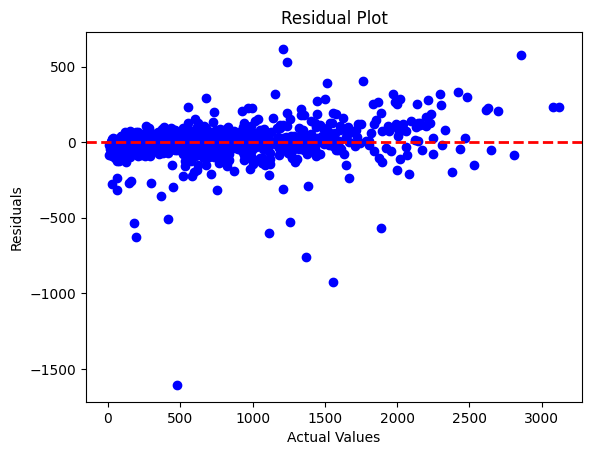

In [189]:
plot_error(y_test**2,optimal_predict**2)

# Save the model

## Pickling the model

In [182]:
import pickle

In [183]:
model_path = '/content/drive/MyDrive/python_data_analysis/final project/models/LGBMRegressor.sav'

In [184]:
pickle.dump(optimal_model, open(model_path, 'wb'))

In [185]:
#save results
f = open('/content/drive/MyDrive/python_data_analysis/final project/models/results.txt', 'w')
f.write(f'{final_mae}\n')
f.write(f'{final_rmse}\n')
f.write(f'{final_r2}\n')
f.close()

## Test it

In [186]:
load_model = pickle.load(open(model_path, 'rb'))

In [187]:
test_predict =  load_model.predict([np.array(x_test.iloc[0])])
display(x_test.head(1))
print('prediction of Rented Bike Count : ', test_predict[0]**2)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day of Week,Day,Month
5993,17,35.6,44,1.549193,1860,1.69,0.0,0.0,2,0,1,8,7


prediction of Rented Bike Count :  1198.8763996417008


In [188]:
y_test.iloc[0]**2

1232.0000000000002